# Compare Regenie new versions and our previous version on the interaciton analysis

- The program: /home/gl2776/working/interaction/versionV3.0.3/regenie_v3.0.3  (downloaded from https://github.com/rgcgithub/regenie/releases/tag/v3.0.3)
- The pipeline: /home/gl2776/working/interaction/versionV3.0.3/Regenie.3.0.3.ipynb

## MWE
Only test first 10 variants for simplification

In [ ]:
#!/bin/sh
#$ -l h_rt=2:00:00
#$ -l h_vmem=3G
#$ -N MWE_interaction
#$ -o /home/gl2776/working/interaction/versionV3.0.3/20220425_MWE/MWE_interaction-$JOB_ID.out
#$ -e /home/gl2776/working/interaction/versionV3.0.3/20220425_MWE/MWE_interaction-$JOB_ID.err  
#$ -j y
#$ -q csg.q
#$ -S /bin/bash
export PATH=$HOME/miniconda3/bin:$PATH
module load Singularity/3.5.3
mwe=~/UKBiobank/MWE_regenie
sos run /home/gl2776/working/interaction/versionV3.0.3/Regenie.3.0.3.ipynb \
    regenie\
    --cwd /home/gl2776/working/interaction/versionV3.0.3/20220425_MWE \
    --bfile ${mwe}/1000G_data/1000G.EUR.filtered.pruned.bed \
    --genoFile ${mwe}/1000G_data/1000G.EUR.bed\
    --phenoFile ${mwe}/1000G_data/1000G.EUR.pheno.x \
    --formatFile /home/gl2776/working/UKBB_GWAS_dev/data/regenie_template.yml \
    --regenieFile /home/gl2776/working/interaction/versionV3.0.3/regenie_v3.0.3 \
    --phenoCol x\
    --covarCol sex  \
    --qCovarCol \
    --bsize 1000\
    --lowmem_dir /home/gl2776/working/interaction/versionV3.0.3/20220425_MWE/scratch60 \
    --trait bt \
    --bgenMinMAF 0.001 \
    --bgenMinINFO 0.8\
    --maf_filter 0.001\9
    --geno_filter 0.1\
    --hwe_filter 5e-08\
    --mind_filter 0.1\
    --minMAC 5\
    --job_size 10\
    --container_lmm /home/gl2776/containers/lmm.sif\
    --container_marp /home/gl2776/containers/marp.sif \
    -c /home/gl2776/working/bioworkflows/admin/csg.yml \
    -q csg -s build \
    &> /home/gl2776/working/interaction/versionV3.0.3/20220425_MWE/MWE_interaction.log

## Comparison

In [2]:
import pandas as pd 
import os
path = "/home/gl2776/working/interaction/newv/112421_regenie_interaction_pipeline_mwe/cache"
filelist=[]
for file in os.listdir(path):
    if file.endswith(".gz"):
        filelist.append(os.path.join(path, file))
len(filelist)

10

In [5]:
file = filelist[0]
data = pd.read_csv(file,header=0,sep=" ")
data  

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,11008,rs575272151,C,G,0.088957,489,ADD,0.021594,0.249341,0.007500,0.031057,NaN
1,1,11008,rs575272151,C,G,0.088957,489,ADD-INT_rs2691277,0.051650,0.699344,0.005455,0.026353,NaN
2,1,11008,rs575272151,C,G,0.088957,489,ADD-INT_SNP,0.004379,0.252079,0.000302,0.006062,NaN
3,1,11008,rs575272151,C,G,0.088957,489,ADD-INT_SNPxrs2691277,0.714704,1.608240,0.197493,0.182599,NaN
4,1,11008,rs575272151,C,G,0.088957,489,ADD-INT_2DF,NaN,NaN,0.205231,0.044565,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051614,22,51228439,rs373624689,G,A,0.055215,489,ADD-INT_SNPxrs2691277,-1.446300,1.478840,0.956472,0.484024,NaN
1051615,22,51228439,rs373624689,G,A,0.055215,489,ADD-INT_2DF,NaN,NaN,1.138900,0.247309,NaN
1051616,22,51234799,rs191117135,G,A,0.016360,489,ADD,0.552075,0.564396,0.956813,0.484138,NaN
1051617,22,51237364,rs200607599,A,G,0.012270,489,ADD,0.725586,0.657836,1.216580,0.568584,NaN


In [6]:
data["LOG10P"].describe()

count    1.051105e+06
mean     3.281600e-01
std      3.440780e-01
min      4.777550e-07
25%      1.015460e-01
50%      2.093170e-01
75%      4.441780e-01
max      5.103510e+00
Name: LOG10P, dtype: float64

<AxesSubplot:>

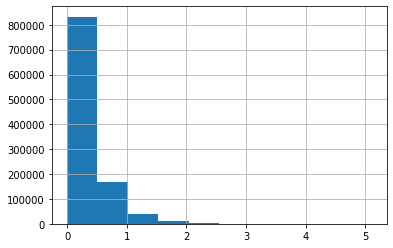

In [7]:
data["LOG10P"].hist()

<AxesSubplot:xlabel='GENPOS', ylabel='LOG10P'>

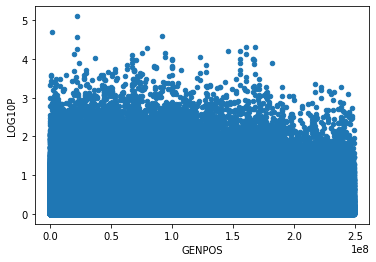

In [9]:
data.plot(kind = 'scatter', x = 'GENPOS', y = "LOG10P")